In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 6]

In [2]:
DATA_DIR = '/home/telescreen/Workspace/fun/Python-for-Computer-Vision-with-OpenCV-and-Deep-Learning/Data/'

In [3]:
full = cv2.imread(DATA_DIR + 'sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

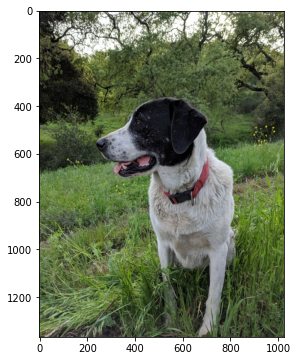

In [4]:
plt.imshow(full)

In [6]:
face = cv2.imread(DATA_DIR + 'sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

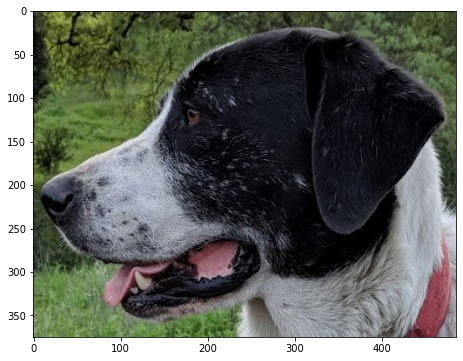

In [7]:
plt.imshow(face)

In [8]:
face.shape

(375, 486, 3)

In [9]:
full.shape

(1367, 1025, 3)

In [15]:
methods = ['TM_CCOEFF','TM_CCOEFF_NORMED','TM_CCORR','TM_CCORR_NORMED','TM_SQDIFF','TM_SQDIFF_NORMED']

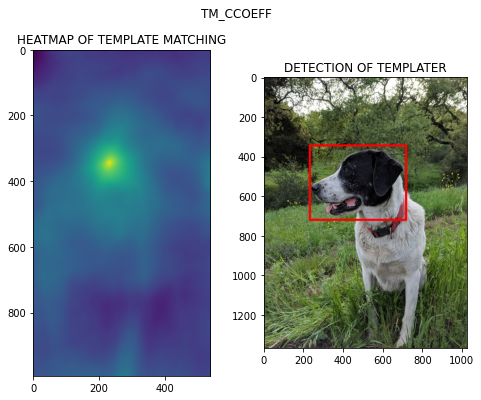

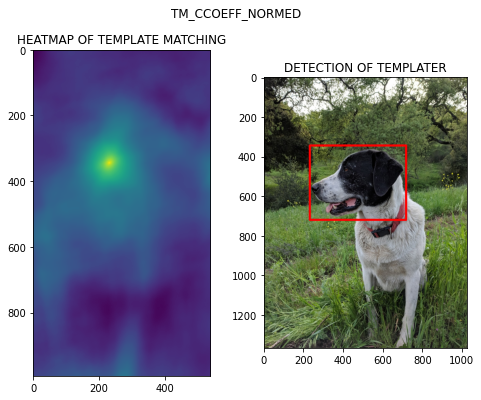

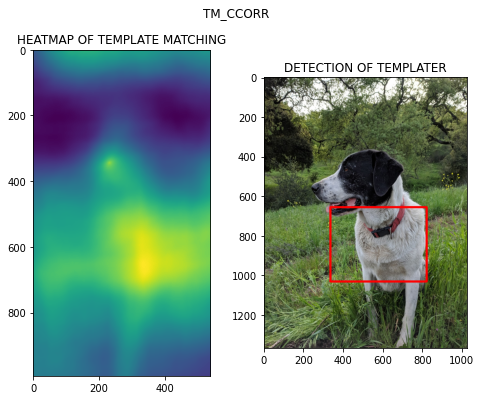

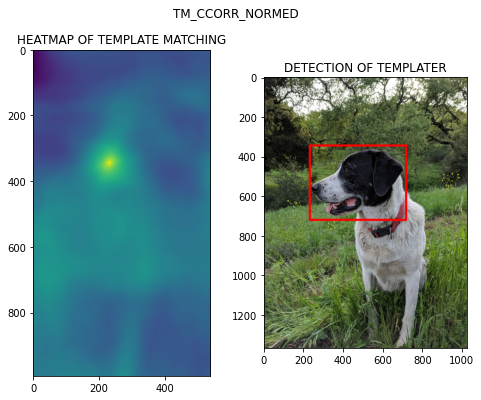

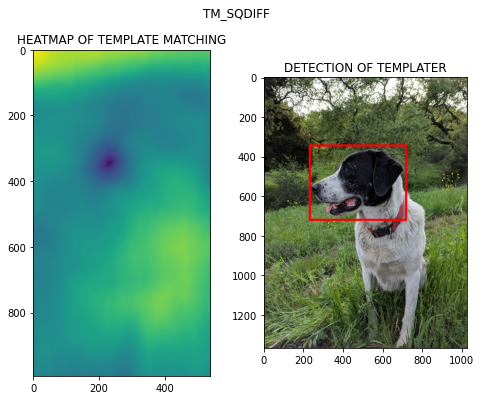

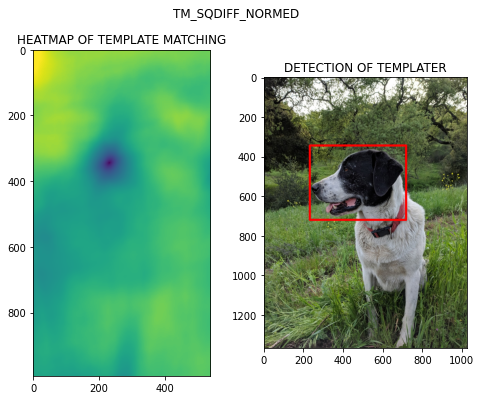

In [19]:
for m in methods:
    full_copy = full.copy()
    method = getattr(cv2, m)
    
    # TEMPLATE MATCHING
    res = cv2.matchTemplate(full_copy, face, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
        
    height, width, channels =face.shape
    
    bottom_right = (top_left[0] + width, top_left[1] + height)
    cv2.rectangle(full_copy, top_left, bottom_right, (255, 0, 0), 10)
    
    # PLOT AND SHOW
    plt.subplot(121)
    plt.imshow(res)
    plt.title('HEATMAP OF TEMPLATE MATCHING')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('DETECTION OF TEMPLATER')
    
    plt.suptitle(m)
    plt.show()